# Mobile App Statistics (Apple iOS app store)

The ever-changing mobile landscape is a challenging space to navigate. . The percentage of mobile over desktop is only increasing. Android holds about 53.2% of the smartphone market, while iOS is 43%. To get more people to download your app, you need to make sure they can easily find your app. Mobile app analytics is a great way to understand the existing strategy to drive growth and retention of future user.

With million of apps around nowadays, the following data set has become very key to getting top trending apps in iOS app store. This data set contains more than 7000 Apple iOS mobile application details. 

#### Data description:

   * "id" : App ID

   * "track_name": App Name

   * "size_bytes": Size (in Bytes)

   * "currency": Currency Type

   * "price": Price amount

   * "ratingcounttot": User Rating counts (for all version)

   * "ratingcountver": User Rating counts (for current version)

   * "user_rating" : Average User Rating value (for all version)

   * "userratingver": Average User Rating value (for current version)

   * "ver" : Latest version code

   * "cont_rating": Content Rating

   * "prime_genre": Primary Genre

   * "sup_devices.num": Number of supporting devices

   * "ipadSc_urls.num": Number of screenshots showed for display

   * "lang.num": Number of supported languages

   * "vpp_lic": Vpp Device Based Licensing Enabled


## Load the libraries and read the data

In [69]:
import os
from os.path import dirname,join,abspath
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
#Another way to load dataset


#print(abspath('.'))
#print(dirname(abspath('.')))
#print(dirname(dirname(abspath('.'))))
#parent_dir=dirname(abspath('.'))
#os.listdir(parent_dir)
#Apple_file=os.listdir(os.path.join(parent_dir,'data'))



In [71]:
df=pd.read_csv(r'C:\Users\hp\Downloads\Assignment\Code Along\GLabs_Data_Science_Learn\Mobile app data analysis\data\AppleStore.csv',index_col='Unnamed: 0')
df.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [72]:
df.shape

(7197, 16)

There are 7197 rows and 16 columns in this dataset

## Basic data study

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7197 entries, 1 to 11097
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7197 non-null   int64  
 1   track_name        7197 non-null   object 
 2   size_bytes        7197 non-null   int64  
 3   currency          7197 non-null   object 
 4   price             7197 non-null   float64
 5   rating_count_tot  7197 non-null   int64  
 6   rating_count_ver  7197 non-null   int64  
 7   user_rating       7197 non-null   float64
 8   user_rating_ver   7197 non-null   float64
 9   ver               7197 non-null   object 
 10  cont_rating       7197 non-null   object 
 11  prime_genre       7197 non-null   object 
 12  sup_devices.num   7197 non-null   int64  
 13  ipadSc_urls.num   7197 non-null   int64  
 14  lang.num          7197 non-null   int64  
 15  vpp_lic           7197 non-null   int64  
dtypes: float64(3), int64(8), object(5)
memory

In [74]:
#check any column for descriptive analysis
df[['price','user_rating']].describe()

,price,user_rating
count,7197.000000,7197.000000
mean,1.726218,3.526956
std,5.833006,1.517948
min,0.000000,0.000000
25%,0.000000,3.500000
50%,0.000000,4.000000
75%,1.990000,4.500000
max,299.990000,5.000000


In [75]:
#check categorical features
df.describe(exclude=np.number)

,track_name,currency,ver,cont_rating,prime_genre
count,7197,7197,7197,7197,7197
unique,7195,1,1590,4,23
top,Mannequin Challenge,USD,1.0,4+,Games
freq,2,7197,317,4433,3862


In [76]:
#This function can provide total rows,missing values,datatype and range all in one dataframe for our data.
def detailed(data):
    ddata=pd.DataFrame(index=['total', '% missing' , 'data Type', 'range'])
    
    for cols in data.columns:
        size = data[cols].size
        pnul=round(data[cols].isna().sum()/size,2)
        nul_val = f"{pnul*100}% - {data[cols].isna().sum()}/{size}"
        dtype = 'categorical' if data[cols].dtype == object else 'Numerical' 
        rng = f"{len(data[cols].unique())} labels"\
        if dtype == 'categorical' else\
        f"{data[cols].min()}-{data[cols].max()}"
        ddata[cols] = [size,nul_val,dtype,rng]
    return ddata

In [77]:
detailed(df)

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
total,7197,7197,7197,7197,7197,7197,7197,7197,7197,7197,7197,7197,7197,7197,7197,7197
% missing,0.0% - 0/7197,0.0% - 0/7197,0.0% - 0/7197,0.0% - 0/7197,0.0% - 0/7197,0.0% - 0/7197,0.0% - 0/7197,0.0% - 0/7197,0.0% - 0/7197,0.0% - 0/7197,0.0% - 0/7197,0.0% - 0/7197,0.0% - 0/7197,0.0% - 0/7197,0.0% - 0/7197,0.0% - 0/7197
data Type,Numerical,categorical,Numerical,categorical,Numerical,Numerical,Numerical,Numerical,Numerical,categorical,categorical,categorical,Numerical,Numerical,Numerical,Numerical
range,281656475-1188375727,7195 labels,589824-4025969664,1 labels,0.0-299.99,0-2974676,0-177050,0.0-5.0,0.0-5.0,1590 labels,4 labels,23 labels,9-47,0-5,0-75,0-1


## Create a new column 'payment_type' and categorize all the applications into 'free' or 'paid'

In [78]:
#Method1:
def free_paid(x):
    if x > 0.00:
        return 'paid'
    else:
         return 'free'

In [79]:
df['Payment_type']=df['price'].apply(lambda x: free_paid(x))
df.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,Payment_type
1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,paid
2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,free
3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,free
4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,free
5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,free


In [80]:
#Method2
def is_free(price):
    assert type(price) in [int,float]
    assert price >= 0
    
    return 'free' if price ==0 else 'paid'


In [81]:
df['Payment_type']=df['price'].map(is_free)
df.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,Payment_type
1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,paid
2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,free
3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,free
4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,free
5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,free


In [82]:
#Method 3
df['Payment_type'] = np.where(df.price == 0, 'free', 'paid')
df.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,Payment_type
1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,paid
2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,free
3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,free
4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,free
5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,free


In [83]:
#Method4
df['Payment_type'] = df.price.apply(lambda x: 'free' if x == 0 else 'paid')
df.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,Payment_type
1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,paid
2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,free
3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,free
4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,free
5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,free


## Number of free apps should be extremly high when compared to paid apps. Lets do a reality check.


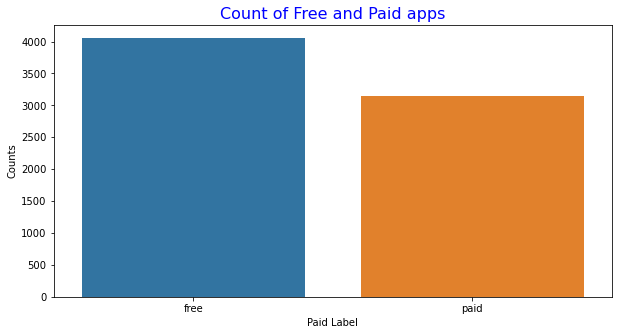

In [84]:
#Method1
fig = plt.figure(figsize=(10, 5))
sns.countplot(x=df.Payment_type,order=df['Payment_type'].value_counts().index)
plt.title('Count of Free and Paid apps', fontsize=16, color='blue')
plt.xlabel('Paid Label')
plt.ylabel('Counts')
plt.show()


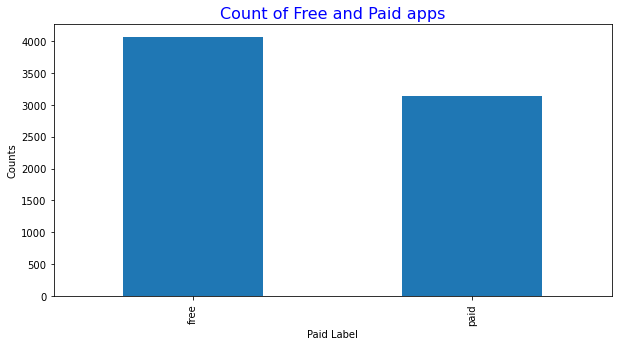

In [85]:
#Method2
fig = plt.figure(figsize=(10, 5))
df['Payment_type'].value_counts().plot(kind='bar')
plt.title('Count of Free and Paid apps', fontsize=16, color='blue')
plt.xlabel('Paid Label')
plt.ylabel('Counts')
plt.show()

In [86]:
#percentage of free and paid apps in dataset
df['Payment_type'].value_counts(normalize=True)*100

free    56.356815
paid    43.643185
Name: Payment_type, dtype: float64

In [87]:
#mean price of paid apps
df.pivot_table(index='Payment_type',values='price',aggfunc='mean')

,price
Payment_type,
free,0.000000
paid,3.955298


## In which price range do most of the paid apps below 50 dollars fall?

In [88]:
paid_apps_below50=df[(df['price']>0) & (df['price'] <50)]

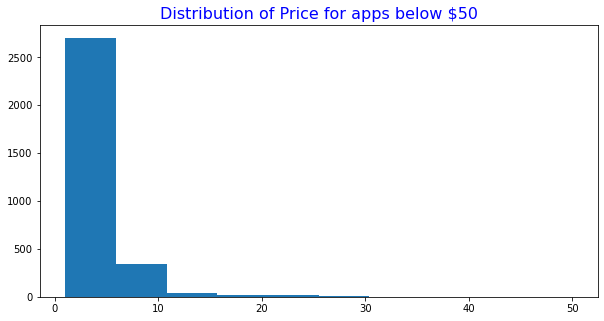

In [89]:
#check distribution of price for apps below $50
fig=plt.figure(figsize=(10,5))
plt.hist(paid_apps_below50['price'])
plt.title('Distribution of Price for apps below $50', fontsize=16, color='blue')
plt.show()

As we can see from the histogram above that the distribution is skewed and most of the values are till $11.So lets check that distribution

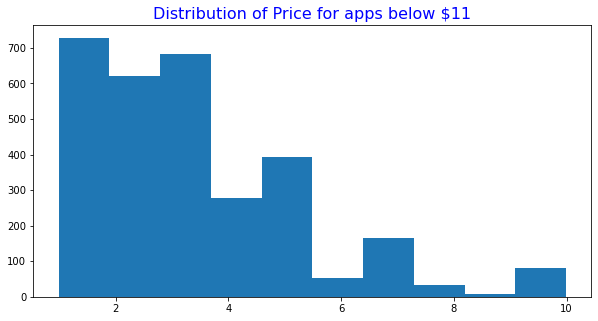

In [90]:
#check distribution of price for apps below $11
fig = plt.figure(figsize=(10, 5))
plt.hist(df[(df['price'] < 11) & (df['price'] > 0)]['price'])
plt.title('Distribution of Price for apps below $11', fontsize=16, color='blue')
plt.show()

As we can see from the histogram above that the distribution is skewed again and most of the values are till $5.So lets check that distribution

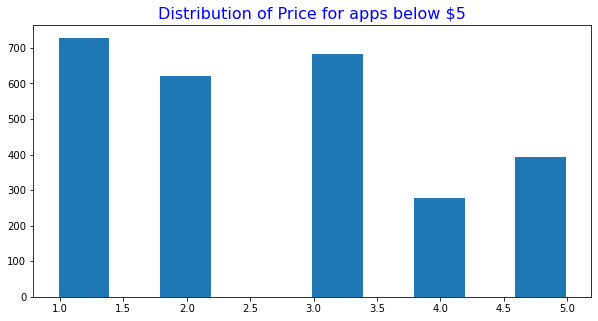

In [91]:
#check distribution of price for apps below $5
fig = plt.figure(figsize=(10, 5))
plt.hist(df[(df['price'] < 5) & (df['price'] > 0)]['price'])
plt.title('Distribution of Price for apps below $5', fontsize=16, color='blue')
plt.show()


We  can clearly see that most of the apps keep their price at $1 to $1.5 .Looking at the this visualization any company into app develpoment can accordingly take decisions

Instead of Histogram, we can also use boxplot to check the distribution of the price of the paid apps

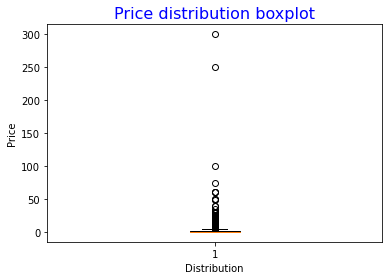

In [92]:
plt.boxplot(df['price'])
plt.title('Price distribution boxplot', fontsize=16, color='blue')
plt.xlabel('Distribution')
plt.ylabel('Price')
plt.show()

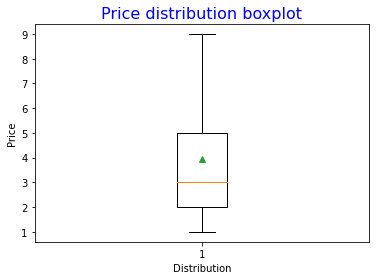

In [93]:
plt.boxplot(df[df['price']>0]['price'],showfliers=False,showmeans=True)
plt.title('Price distribution boxplot', fontsize=16, color='blue')
plt.xlabel('Distribution')
plt.ylabel('Price')
plt.show()

In [94]:
#Putting the prices in a category
def price_cat(price):
    if price==0:
        return 'free'
    elif price < 4:
        return 'economical'
    elif price<10 :
        return 'moderate'
    elif price<50 :
        return 'expensive'
    else:
        return 'premium'

In [95]:
df['Price_category']=df['price'].map(price_cat)
df.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,Payment_type,Price_category
1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,paid,economical
2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,free,free
3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,free,free
4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,free,free
5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,free,free


<AxesSubplot:xlabel='Price_category', ylabel='count'>

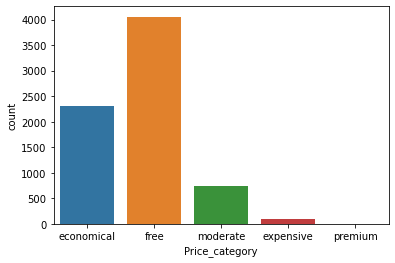

In [96]:
sns.countplot(x=df.Price_category)

In [97]:
df['Price_category'].value_counts()

free          4056
economical    2309
moderate       735
expensive       90
premium          7
Name: Price_category, dtype: int64

## Which category of 'prime_genre' most of the apps fall under?

<AxesSubplot:xlabel='count', ylabel='prime_genre'>

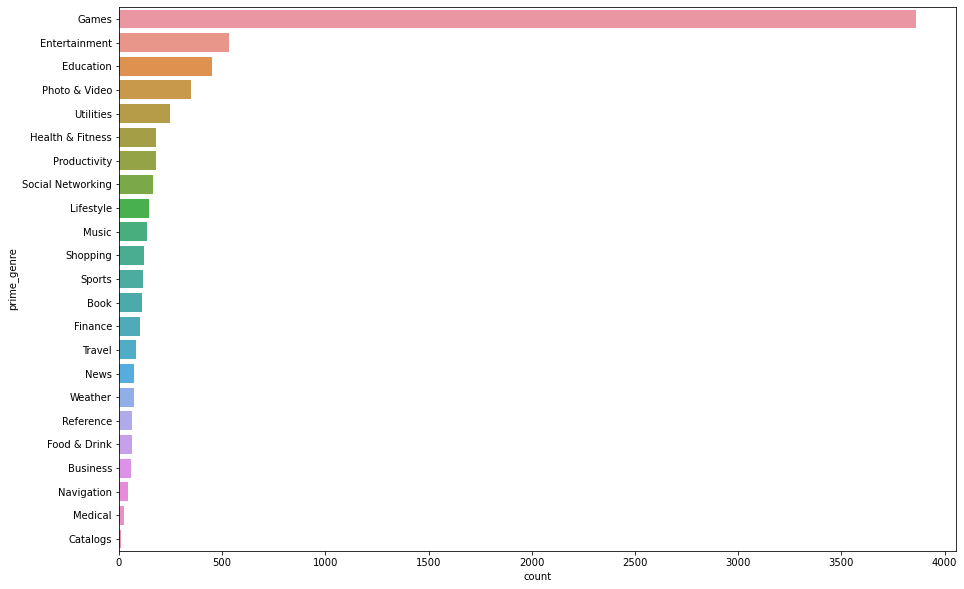

In [98]:
#Method1
#apps according to genre in descending order
plt.figure(figsize=(15,10))
sns.countplot(y=df.prime_genre,order = df['prime_genre'].value_counts().index)

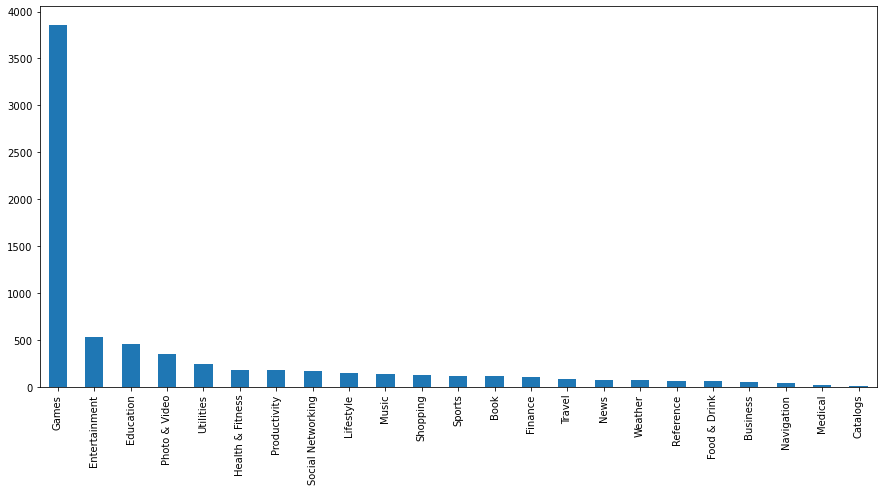

In [99]:
#Method2
#apps according to genre in descending order
fig = plt.figure(figsize=(15, 7))
df['prime_genre'].value_counts().plot(kind='bar')
plt.show()

## Find the top 5 "prime_genre' in terms of count. Are the paid apps for these genres good enough?

In [100]:
# Finding the top 5 genres
top_genre = df.prime_genre.value_counts().sort_values(ascending = False)
top_genre.head()

Games            3862
Entertainment     535
Education         453
Photo & Video     349
Utilities         248
Name: prime_genre, dtype: int64

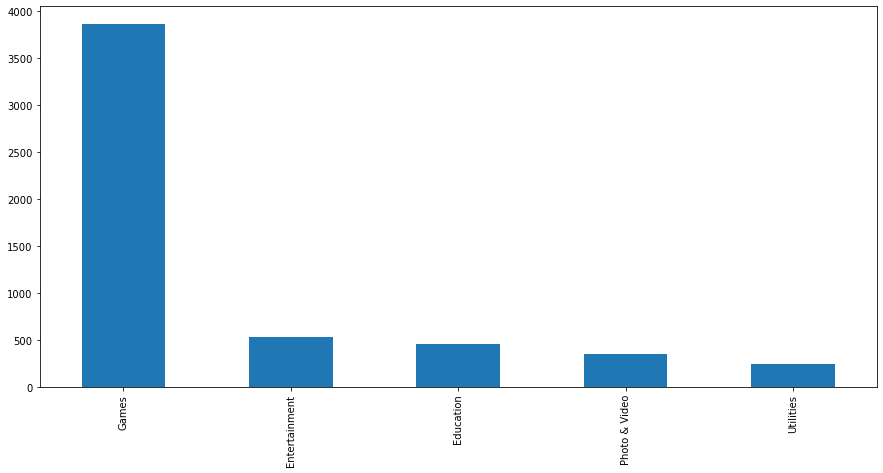

In [101]:
fig = plt.figure(figsize=(15, 7))
df['prime_genre'].value_counts()[:5].plot(kind='bar')
plt.show()

### Create a new column "size_mb" converting bytes to megabytes. For the applications below 50 dollars, does the price of the app increases with the increase in its size?

In [102]:

df['size_mb']=df['size_bytes'].map(lambda x: round(x/(1024*1024),2))
df.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,Payment_type,Price_category,size_mb
1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,paid,economical,96.12
2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,free,free,151.23
3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,free,free,95.87
4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,free,free,122.56
5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,free,free,88.48


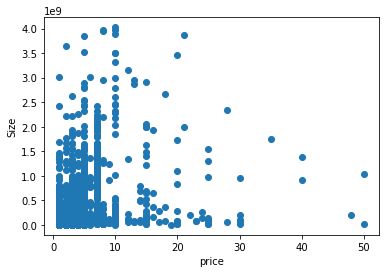

In [103]:
plt.scatter(paid_apps_below50['price'],paid_apps_below50['size_bytes'])
plt.xlabel('price')
plt.ylabel('Size')
plt.show()

As we can see from the scatter plot that there is no correlation between size of the app and its price

## Can we create a filter based on "user_rating" and "rating_count_tot"?

Usually in an app store there are filters where we can choose the size,rating,count of rating etc and then search to download apps.That is what we are doing in the code below i.e creating filters based on user rating and rating count total.

In [104]:
def shortlist(user_rating, rating_count):
    """
    Shortlists apps
    """
    return df[
        (df['user_rating'] > user_rating) & (df['rating_count_tot'] > rating_count)
    ]['track_name'].values

In [105]:
#cross check the function
myapps = shortlist(4.3, 2100)

In [106]:
myapps


array(['Bible', 'Solitaire by MobilityWare', 'FreeCell', ...,
       'Mobile Legends: Bang bang', 'SMILE Inc.', 'Bottle Flip!'],
      dtype=object)

These are the apps which have user rating above 4.3 and total rating count more than 2100

## Count of apps with device based license enabled and disabled resapectively

In [107]:
df['vpp_lic'].value_counts()

1    7147
0      50
Name: vpp_lic, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='vpp_lic', ylabel='count'>

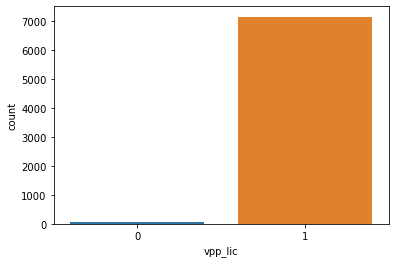

In [108]:
sns.countplot(df['vpp_lic'])

Most of the apps have enabled their liscence

# Primary genre with max device based license enabled

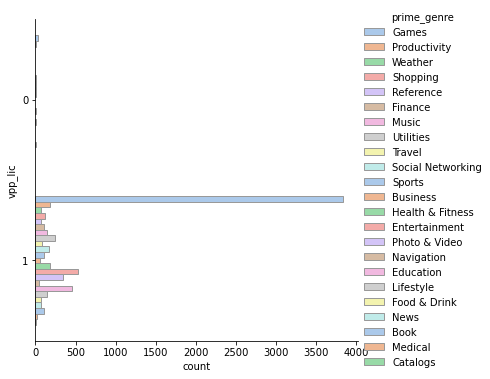

In [109]:
sns.catplot(y="vpp_lic", hue="prime_genre", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)